# **Differential Evolution Algorithm Phases**

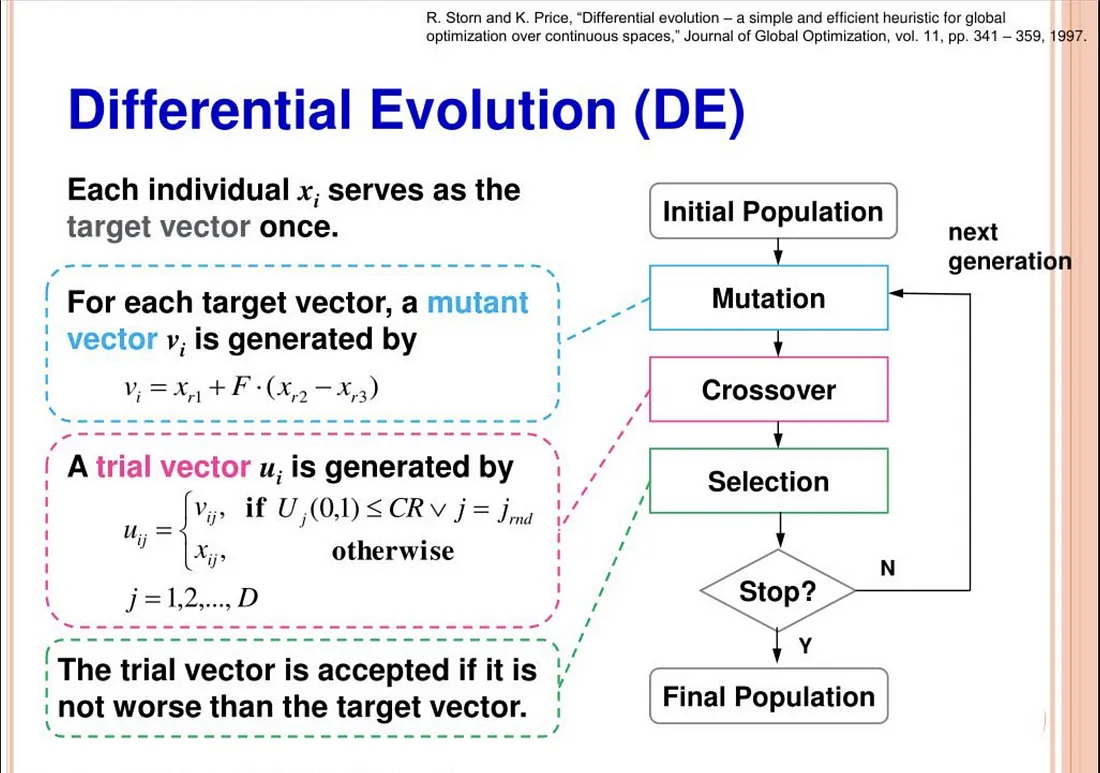

# **Differential Evolution Algorithm on the Sphere Function**



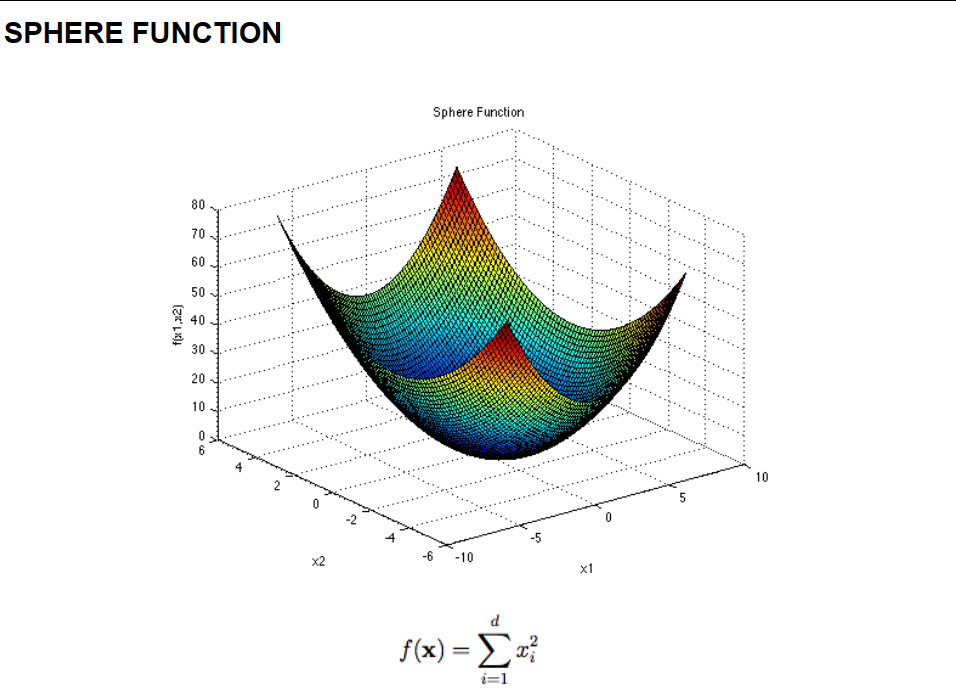

# **Load libraries**

In [10]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import matplotlib.pyplot as plt

#**Define Sphere objective function**

In [2]:
def obj(x):
    """Compute the objective function."""
    return x[0]**2.0 + x[1]**2.0

# **Define mutation operation**

In [3]:
# mutated vector is generated by computing: a + F * (b – c). Recall that F ∈ [0, 2]
def mutation(x, F):
    """Mutate vector x."""
    return x[0] + F * (x[1] - x[2])

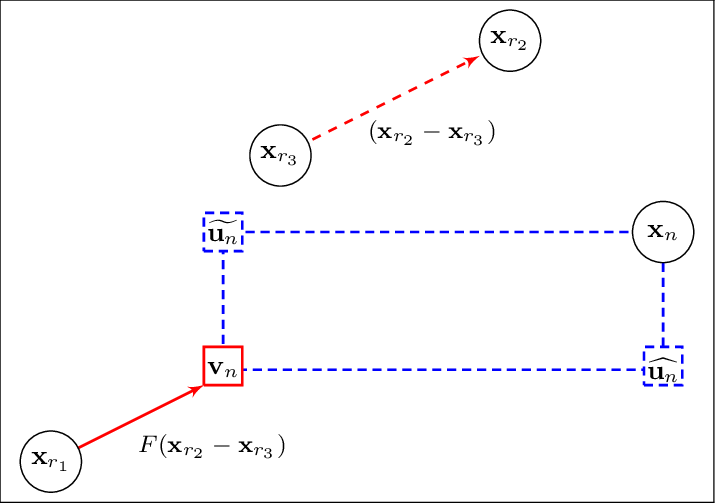

# **Define boundary check operation**

In [4]:
def check_bounds(mutated, bounds):
    """Ensure bounds are respected."""
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

# **Define crossover operation**

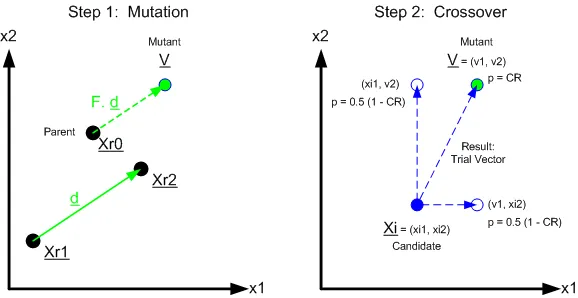

In [5]:
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial

# **Differential Evolution Function**

In [6]:
def differential_evolution(pop_size, bounds, iterations, F, cr):
    pop = bounds[:, 0] + (np.random.rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    obj_all = [obj(ind) for ind in pop]
    best_vector = pop[np.argmin(obj_all)]
    best_obj = np.min(obj_all)
    prev_obj = best_obj
    obj_iter = []

    for i in range(iterations):
        for j in range(pop_size):
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[np.random.choice(candidates, 3, replace=False)]
            mutated = mutation([a, b, c], F)
            mutated = check_bounds(mutated, bounds)
            trial = crossover(mutated, pop[j], len(bounds), cr)
            obj_target = obj(pop[j])
            obj_trial = obj(trial)
            if obj_trial < obj_target:
                pop[j] = trial
                obj_all[j] = obj_trial

        best_obj = np.min(obj_all)
        if best_obj < prev_obj:
            best_vector = pop[np.argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            print('Iteration: %d f([%s]) = %.5f' % (i, np.around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter]

In [8]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np
import copy

In [ ]:
def run_differential_evolution():
    pop_size = int(entry_pop_size.get())
    bounds_min = float(entry_bounds_min.get())
    bounds_max = float(entry_bounds_max.get())
    iterations = int(entry_iterations.get())
    F = float(entry_F.get())
    cr = float(entry_cr.get())

    bounds = np.array([[bounds_min, bounds_max], [bounds_min, bounds_max]])

    solution = differential_evolution(pop_size, bounds, iterations, F, cr)

    # Plot convergence
    fig = plt.Figure(figsize=(5, 4), dpi=100)
    plot = fig.add_subplot(1, 1, 1)
    plot.plot(solution[2], '.-')
    plot.set_xlabel('Iteration')
    plot.set_ylabel('Objective Value')
    plot.set_title('Convergence Plot')
    plot.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=app)
    canvas.draw()
    canvas.get_tk_widget().grid(row=9, columnspan=4)

app = tk.Tk()
app.title("Differential Evolution Demo")

label_pop_size = ttk.Label(app, text="Population Size:")
label_pop_size.grid(row=0, column=0)
entry_pop_size = ttk.Entry(app)
entry_pop_size.grid(row=0, column=1)

label_bounds = ttk.Label(app, text="Bounds (Min/Max):")
label_bounds.grid(row=1, column=0)
entry_bounds_min = ttk.Entry(app)
entry_bounds_min.grid(row=1, column=1)
entry_bounds_max = ttk.Entry(app)
entry_bounds_max.grid(row=1, column=2)

label_iterations = ttk.Label(app, text="Iterations:")
label_iterations.grid(row=2, column=0)
entry_iterations = ttk.Entry(app)
entry_iterations.grid(row=2, column=1)

label_F = ttk.Label(app, text="Scale Factor (F):")
label_F.grid(row=3, column=0)
entry_F = ttk.Entry(app)
entry_F.grid(row=3, column=1)

label_cr = ttk.Label(app, text="Crossover Rate (CR):")
label_cr.grid(row=4, column=0)
entry_cr = ttk.Entry(app)
entry_cr.grid(row=4, column=1)

btn_run = ttk.Button(app, text="Run Differential Evolution", command=run_differential_evolution)
btn_run.grid(row=5, columnspan=2, pady=10)

app.mainloop()

Iteration: 0 f([[0.09847 0.     ]]) = 0.00970
Iteration: 4 f([[0. 0.]]) = 0.00000
Iteration: 0 f([[0.41921 0.40924]]) = 0.34322
Iteration: 1 f([[0.26719 0.29278]]) = 0.15711
Iteration: 2 f([[0.26719 0.19223]]) = 0.10834
Iteration: 7 f([[0.      0.12376]]) = 0.01532
Iteration: 9 f([[0. 0.]]) = 0.00000
Iteration: 1 f([[0.      0.10814]]) = 0.01169
Iteration: 5 f([[0.      0.07451]]) = 0.00555
Iteration: 6 f([[0. 0.]]) = 0.00000
Iteration: 0 f([[0. 0.]]) = 0.00000
Iteration: 0 f([[0.1818 0.2222]]) = 0.08243
Iteration: 1 f([[0.1818 0.    ]]) = 0.03305
Iteration: 2 f([[0. 0.]]) = 0.00000
